In [228]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib
import seaborn as sns
import csv
import re 
from matplotlib import pyplot as plt
from sklearn import ensemble, cross_validation, learning_curve, metrics , tree, naive_bayes, utils
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import load_digits, load_breast_cancer, load_iris
from sklearn.cross_validation import cross_val_score, KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, BaggingRegressor
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.preprocessing import StandardScaler, scale, OneHotEncoder
from sklearn.grid_search import GridSearchCV
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [280]:
df = pd.read_csv('train2.csv')

In [281]:
df

year  day  team1  team2  score1  score2 target
0       2998   19    317    131     336     278   True
1       2998   28     61     29     301     259   True
2       2998   28    110    141     359     267   True
3       2998   28    352    146     309     410  False
4       2998   28    229     91     332     220   True
5       2998   28    164    238     236     278  False
6       2998   28    184    243     181     224  False
7       2998   28    245     23     216     185   True
8       2998   28    300    349     402     321   True
9       2998   30     61    110     259     325  False
10      2998   30    229    245     294     185   True
11      2998   30    300    243     220     178   True
12      2998   31     10    310     282     232   True
13      2998   31     39     69     317     259   True
14      2998   31    205     43     282     352  False
15      2998   31     47    112     406     398   True
16      2998   31    180     51     282     328  False
17      2998   31     53     22     417     297   True
18      2998   31     63    116     294     178   True
19      2998   31     82    312     336     297   True
20      2998   31    265    101     263     305  False
21      2998   31     70    125     390     448  False
22      2998   31    150    117     332     286   True
23      2998   31    188    158     425     541  False
24      2998   31    161    319     297     294   True
25      2998   31    241    166     212     379  False
26      2998   31    273    169     228     363  False
27      2998   31    232    185     150     301  False
28      2998   31    201     98     309     267   True
29      2998   31    207    126     433     379   True
...      ...  ...    ...    ...     ...     ...    ...
101579  3019  230    333    286     317     305   True
101580  3019  230    335    146     247     185   True
101581  3019  230    215    351     286     294  False
101582  3019  230    358    176     263     228   True
101583  3019  231    225      3     178     251  False
101584  3019  231      7    336     205     189   True
101585  3019  231     52    123     290     232   True
101586  3019  231      4     96     197     236  False
101587  3019  231    143    142     208     270  False
101588  3019  231    157    293     301     236   True
101589  3019  231    172    279     352     305   True
101590  3019  231    201    174     274     313  False
101591  3019  231    335    179     201     247  False
101592  3019  231    351    185     247     259  False
101593  3019  231    188    199     208     220  False
101594  3019  231    207    324     243     216   True
101595  3019  231    326    208     212     247  False
101596  3019  231    214    168     305     294   True
101597  3019  231    272    222     255     263  False
101598  3019  231    177    226     224     236  False
101599  3019  231    317    232     267     301  False
101600  3019  231    314    234     212     247  False
101601  3019  231    241    280     170     174  False
101602  3019  231    287     39     259     216   True
101603  3019  231    333    169     274     239   True
101604  3019  231    131    358     216     263  False
101605  3019  233    174    214     336     297   True
101606  3019  233     96    179     243     255  False
101607  3019  233    226    358     193     166   True
101608  3019  233    333    287     216     239  False

[101609 rows x 7 columns]

In [249]:
for year in df.year.unique():
    df_for_one_year = df[df['year'] == year]
    print (year)
    #print(sorted(df_for_one_year.day.unique()))
    for day in df_for_one_year.day.unique():
        if df_for_one_year[df_for_one_year['day'] == day].shape[0] == 1:
            print(day)
            print(df_for_one_year[df_for_one_year['day'] == day].values)
    print()
    print()

2998
19
[[2998 19 317 131 336 278 True]]
42
[[2998 42 196 166 274 294 False]]
122
[[2998 122 13 325 247 267 False]]


2999
33
[[2999 33 317 99 332 321 True]]
42
[[2999 42 51 208 251 290 False]]


3000
37
[[3000 37 35 121 301 305 False]]
42
[[3000 42 239 118 387 181 True]]
93
[[3000 93 347 271 239 286 False]]
107
[[3000 107 39 70 232 224 True]]


3001
42
[[3001 42 12 178 270 278 False]]


3002
111
[[3002 111 163 196 208 220 False]]


3003


3004


3005
30
[[3005 30 210 38 328 243 True]]
104
[[3005 104 207 349 236 270 False]]


3006


3007
111
[[3007 111 91 298 332 309 True]]


3008
102
[[3008 102 84 157 297 363 False]]
113
[[3008 113 361 303 325 348 False]]


3009


3010


3011
93
[[3011 93 122 349 243 425 False]]


3012
95
[[3012 95 78 157 185 216 False]]


3013


3014
90
[[3014 90 187 157 189 282 False]]


3015
93
[[3015 93 93 63 212 290 False]]


3016
95
[[3016 95 271 352 325 348 False]]


3017
97
[[3017 97 271 250 236 267 False]]


3018


3019




In [ ]:
#3002
#111
#[[3002 111 163 196 208 220 False]]

In [328]:
sorted(df_3002.day.unique())

[28,
 30,
 31,
 37,
 38,
 40,
 42,
 44,
 46,
 47,
 49,
 51,
 53,
 54,
 56,
 58,
 60,
 61,
 63,
 65,
 67,
 69,
 70,
 72,
 74,
 76,
 77,
 79,
 81,
 83,
 84,
 86,
 88,
 90,
 92,
 93,
 95,
 102,
 104,
 106,
 107,
 109,
 111,
 113,
 115,
 116,
 118,
 120,
 122,
 123,
 125,
 127,
 129,
 130,
 132,
 134,
 136,
 138,
 139,
 141,
 143,
 145,
 146,
 148,
 150,
 152,
 153,
 155,
 157,
 159,
 161,
 162,
 164,
 166,
 168,
 169,
 171,
 173,
 175,
 177,
 178,
 180,
 182,
 184,
 185,
 187,
 189,
 191,
 192,
 194,
 196,
 198,
 200,
 201,
 203,
 205,
 207,
 208,
 210,
 212,
 214,
 215,
 217,
 219,
 221,
 223,
 224,
 226,
 228,
 230,
 231,
 233]

In [267]:
df_3002 = df[df['year'] == 3002]

In [284]:
df_3002.team1.unique()

array([153,  16, 110, 176, 228, 351,  59, 251, 296, 214, 317, 358, 265,
       295, 107, 134,  47, 335,  81, 111,  12,  20, 262,  45, 151,  96,
       103, 112,  73,  63,  48, 141, 168, 173, 202, 334, 185, 305, 326,
       363,  24,  70, 221, 264, 322, 285, 287, 291, 241, 314, 149, 333,
       338,  86, 355, 357, 311,  30, 171,  29, 219, 323,  56, 274,  71,
       161,  78, 231, 184, 114,  75, 116,  52, 327, 147, 142,  33, 145,
       157, 159, 165, 245, 175, 178, 268, 359, 310, 140, 192,   2, 340,
       232, 210, 223, 230, 188, 312, 206, 247,  35, 250, 252, 233, 237,
       283, 288, 249, 148, 300,  69, 341, 348, 352, 284, 321, 118, 354,
       204, 217, 281, 260, 297, 258, 196, 253,  60, 179, 124, 104,  44,
        65, 306, 170,  94, 336, 150, 276, 325, 331, 356,  13,  17,  62,
        98, 101, 307, 117,  83, 131,  79, 135,  51, 146, 172, 177,  49,
       180, 181, 344,  40, 364, 244, 248, 158, 273, 164, 263, 293, 320,
       183, 339, 349,  43,  50,  53,  55, 298, 218,  37,  77,  3

In [272]:
df_home = df_3002[df_3002['team1'] == 297]
df_away = df_3002[df_3002['team2'] == 297]
df_all = pd.concat([df_home, df_away], axis=0)
df_all.sort_values('day')

year  day  team1  team2  score1  score2 target
16388  3002   47    297    109     286     228   True
16471  3002   53     50    297     305     294   True
16629  3002   58    236    297     267     220   True
16769  3002   65    297    341     243     197   True
16893  3002   70    297     22     309     270   True
17016  3002   83    297    172     212     220  False
17124  3002   88    297    122     267     189   True
17218  3002   93    297    278     208     166   True
17291  3002  102    174    297     208     216  False
17576  3002  115     20    297     239     255  False
17744  3002  120    335    297     251     212   True
17858  3002  127    297    276     224     239  False
17981  3002  132    146    297     236     170   True
18106  3002  136    297    299     251     205   True
18137  3002  139    297      4     205     239  False
18338  3002  145    108    297     239     259  False
18609  3002  157    297    180     228     232  False
18789  3002  164    179    297     201     259  False
18899  3002  169    297    108     189     263  False
19076  3002  177    297     96     197     243  False
19407  3002  189    297    161     282     251   True
19529  3002  194    146    297     348     193   True
19716  3002  201     16    297     228     255  False
19895  3002  207    335    297     305     363  False
20022  3002  214    276    297     255     201   True
20119  3002  219     96    297     282     274   True
20296  3002  228      4    297     251     297  False
20309  3002  230    297    108     243     286  False

In [273]:
teams = {}
for _, __, team1, team2, ____, _____, _______ in df_all.values:
    if team1 != 297:
        if team1 in teams:
            teams[team1] += 1
        else:
            teams[team1] = 1
    if team2 != 297:
        if team2 in teams:
            teams[team2] += 1
        else:
            teams[team2] = 1

In [274]:
len(teams)

21

In [275]:
teams

{4: 2,
 16: 1,
 20: 1,
 22: 1,
 50: 1,
 96: 2,
 108: 3,
 109: 1,
 122: 1,
 146: 2,
 161: 1,
 172: 1,
 174: 1,
 179: 1,
 180: 1,
 236: 1,
 276: 2,
 278: 1,
 299: 1,
 335: 2,
 341: 1}

In [234]:
df_test = pd.read_csv('test2.csv')

In [230]:
df.head()

year  day  team1  team2  score1  score2 target
0  2998   19    317    131     336     278   True
1  2998   28     61     29     301     259   True
2  2998   28    110    141     359     267   True
3  2998   28    352    146     309     410  False
4  2998   28    229     91     332     220   True

In [236]:
for col in df:
    print(col, "len = ", len(df[col].unique()), '\n', sorted(df[col].unique()), '\n')

year len =  22 
 [2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019] 

day len =  133 
 [0, 1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 21, 23, 24, 26, 28, 30, 31, 33, 35, 37, 38, 40, 42, 44, 46, 47, 49, 51, 53, 54, 56, 58, 60, 61, 63, 65, 67, 69, 70, 72, 74, 76, 77, 79, 81, 83, 84, 86, 88, 90, 92, 93, 95, 97, 99, 100, 102, 104, 106, 107, 109, 111, 113, 115, 116, 118, 120, 122, 123, 125, 127, 129, 130, 132, 134, 136, 138, 139, 141, 143, 145, 146, 148, 150, 152, 153, 155, 157, 159, 161, 162, 164, 166, 168, 169, 171, 173, 175, 177, 178, 180, 182, 184, 185, 187, 189, 191, 192, 194, 196, 198, 200, 201, 203, 205, 207, 208, 210, 212, 214, 215, 217, 219, 221, 223, 224, 226, 228, 230, 231, 233] 

team1 len =  353 
 [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 5

In [237]:
for col in df_test:
    if col == 'Id':
        continue
    print(col, "len = ", len(df_test[col].unique()), '\n', sorted(df_test[col].unique()), '\n')

year len =  2 
 [3020, 3021] 

team1 len =  350 
 [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [233]:
df['score1'].mean()

270.28140223799073

In [53]:
df.head(20)

year  day  team1  team2  score1  score2 target
0   2998   19    317    131     336     278   True
1   2998   28     61     29     301     259   True
2   2998   28    110    141     359     267   True
3   2998   28    352    146     309     410  False
4   2998   28    229     91     332     220   True
5   2998   28    164    238     236     278  False
6   2998   28    184    243     181     224  False
7   2998   28    245     23     216     185   True
8   2998   28    300    349     402     321   True
9   2998   30     61    110     259     325  False
10  2998   30    229    245     294     185   True
11  2998   30    300    243     220     178   True
12  2998   31     10    310     282     232   True
13  2998   31     39     69     317     259   True
14  2998   31    205     43     282     352  False
15  2998   31     47    112     406     398   True
16  2998   31    180     51     282     328  False
17  2998   31     53     22     417     297   True
18  2998   31     63    116     294     178   True
19  2998   31     82    312     336     297   True

In [54]:
df1 = df[df['team1'] == 131]
df1

year  day  team1  team2  score1  score2 target
379     2998   51    131    223     301     178   True
732     2998   70    131     41     383     201   True
1318    2998  107    131     53     313     232   True
1744    2998  125    131    226     352     321   True
2507    2998  157    131    177     232     294  False
2620    2998  162    131    128     294     251   True
2857    2998  171    131    134     313     255   True
3245    2998  189    131    177     398     282   True
3454    2998  196    131    226     332     309   True
3730    2998  208    131    128     294     270   True
3994    2998  221    131    176     232     263  False
4138    2999   31    131    308     394     356   True
4142    2999   40    131     99     313     301   True
4339    2999   58    131    142     267     286  False
4735    2999   83    131     53     305     247   True
4941    2999   97    131     39     348     185   True
4969    2999   99    131     60     328     251   True
5357    2999  115    131    134     290     259   True
5616    2999  125    131    176     294     290   True
5787    2999  132    131    128     321     305   True
6164    2999  146    131    226     367     267   True
6251    2999  152    131    178     236     220   True
6385    2999  157    131    221     359     274   True
6687    2999  169    131    134     282     255   True
7169    2999  189    131    128     359     278   True
7603    2999  207    131    178     332     290   True
7814    2999  215    131    221     379     267   True
7997    2999  226    131    177     383     263   True
8102    2999  233    131    358     336     309   True
8161    3000   46    131     39     274     290  False
...      ...  ...    ...    ...     ...     ...    ...
92200   3018   60    131    291     325     193   True
92675   3018   86    131    124     414     193   True
92823   3018   92    131    320     344     181   True
92948   3018  102    131    177     251     309  False
93650   3018  129    131    178     286     297  False
93852   3018  134    131    226     243     309  False
93929   3018  139    131    204     267     270  False
94499   3018  159    131    134     398     344   True
94579   3018  164    131    176     216     263  False
94728   3018  169    131    245     301     236   True
95713   3018  207    131    178     267     193   True
95844   3018  212    131    177     270     212   True
96099   3018  221    131    245     328     286   True
96190   3018  228    131    236     290     224   True
96261   3018  230    131    358     274     305  False
96321   3019    7    131     36     375     208   True
96806   3019   24    131    108     255     205   True
97154   3019   38    131    214     321     228   True
97314   3019   46    131     64     336     197   True
97902   3019   77    131    191     359     208   True
98282   3019   99    131    134     267     251   True
98595   3019  111    131    236     286     197   True
98800   3019  120    131    178     340     313   True
98943   3019  125    131    358     228     247  False
99545   3019  146    131    177     290     270   True
100187  3019  171    131    226     313     263   True
100410  3019  182    131    245     321     212   True
101421  3019  221    131    176     278     274   True
101547  3019  230    131    128     309     247   True
101604  3019  231    131    358     216     263  False

[330 rows x 7 columns]

In [101]:
df2 = df[df['team1'] == 39]
df2

year  day  team1  team2  score1  score2 target
13      2998   31     39     69     317     259   True
145     2998   38     39    223     259     232   True
262     2998   46     39    131     282     375  False
372     2998   51     39     68     387     321   True
620     2998   61     39    173     371     282   True
664     2998   65     39    334     321     309   True
976     2998   86     39     23     301     278   True
1578    2998  120     39     91     321     340  False
1970    2998  132     39    353     255     267  False
2157    2998  145     39     73     321     255   True
2283    2998  148     39     50     336     325   True
2459    2998  157     39    160     263     243   True
2742    2998  169     39     78     367     325   True
2964    2998  177     39    236     247     259  False
3062    2998  182     39     91     267     301  False
3621    2998  207     39    160     301     294   True
3892    2998  219     39    362     371     332   True
4033    2998  228     39     78     336     270   True
4177    2999   51     39    132     216     270  False
4800    2999   84     39    214     216     398  False
4957    2999   99     39    283     352     232   True
5305    2999  113     39    334     313     239   True
5562    2999  123     39    147     247     228   True
5881    2999  136     39    223     270     216   True
6027    2999  141     39    362     228     243  False
6044    2999  145     39     73     270     255   True
6352    2999  157     39     82     332     309   True
6591    2999  166     39     78     317     328  False
6652    2999  169     39    160     263     197   True
7880    2999  219     39     78     251     274  False
...      ...  ...    ...    ...     ...     ...    ...
92545   3018   83     39    245     259     251   True
92799   3018   92     39    290     274     255   True
92983   3018  104     39    353     205     189   True
93515   3018  122     39     78     251     294  False
93955   3018  141     39    127     220     189   True
94341   3018  153     39    354     162     205  False
94492   3018  157     39    353     263     309  False
95019   3018  182     39     56     201     189   True
95187   3018  187     39    160     243     220   True
95341   3018  194     39    132     290     208   True
95657   3018  205     39    334     228     274  False
96084   3018  219     39    334     178     251  False
96797   3019   24     39    166     278     274   True
97287   3019   46     39     23     259     205   True
97467   3019   53     39    137     336     212   True
97720   3019   70     39    131     340     332   True
98004   3019   83     39     91     290     259   True
98166   3019   95     39    335     263     189   True
98324   3019  102     39    235     270     220   True
98452   3019  107     39    209     220     170   True
98770   3019  120     39     73     305     282   True
99089   3019  132     39    111     247     243   True
99731   3019  157     39    248     290     263   True
99913   3019  164     39    282     297     224   True
100048  3019  169     39    103     228     216   True
100240  3019  177     39     50     259     274  False
100547  3019  187     39     82     263     189   True
101126  3019  207     39    333     201     325  False
101318  3019  219     39    362     259     239   True
101490  3019  228     39     73     282     259   True

[348 rows x 7 columns]

In [287]:
days = list(df_3002.day.unique())

112

In [290]:
cnt_games = []
for day in days:
    cnt_games.append(df_3002[df_3002['day'] == day].shape[0])

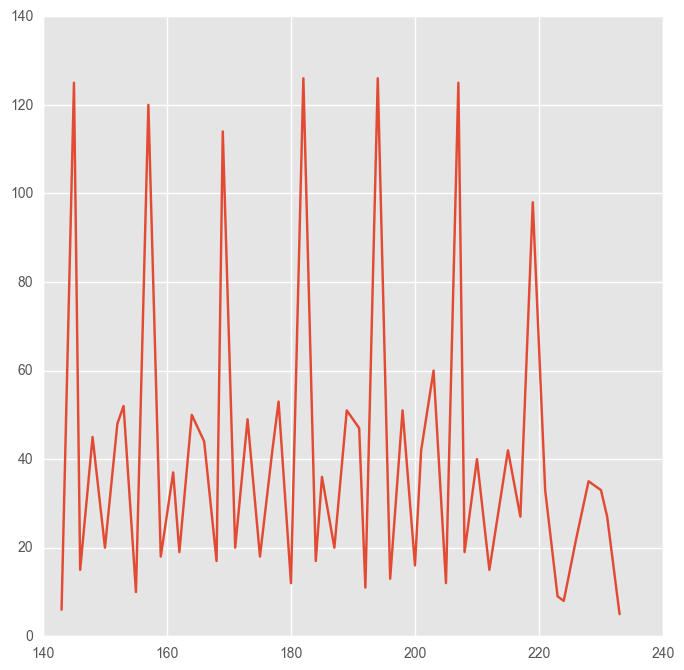

In [295]:
plt.figure(figsize=(8,8))
plt.plot(days[60:], cnt_games[60:])

In [305]:
cnt_games[62:69]

[15, 45, 20, 48, 52, 10, 120]

In [307]:
target_days = days[62:69]

In [315]:
a = [1, 2, 3]

In [316]:
a.pop(0)

1

In [317]:
a

[2, 3]

In [318]:
unique_groups = []
for tday in target_days:
    df_tday = df_3002[df_3002['day'] == tday]
    for _, __, team1, team2, ____, _____, _______ in df_tday.values:
        if len(unique_groups) == 0:
            unique_groups.append([team1, team2])
        group_for_team1 = -1;
        group_for_team2 = -2;
        for i, group in enumerate(unique_groups):
            if team1 in group:
                group_for_team1 = i
            if team2 in group:
                group_for_team2 = i
        if group_for_team1 == group_for_team2:
            continue
        if group_for_team1 == -1 and group_for_team2 == -2:
            unique_groups.append([team1, team2])
            continue
        if group_for_team1 == -1:
            unique_groups[group_for_team2].append(team1)
            continue
        if group_for_team2 == -2:
            unique_groups[group_for_team1].append(team2)
            continue
        else:
            unique_groups[group_for_team1] += unique_groups[group_for_team2]
            unique_groups.pop(group_for_team2)
            continue

In [327]:
sum = 0
for i in range(len(unique_groups)):
    sum += len(unique_groups[i])
print(sum)

301


In [57]:
x = list(map(lambda x: x[0], stat))
y = list(map(lambda x: x[1], stat))

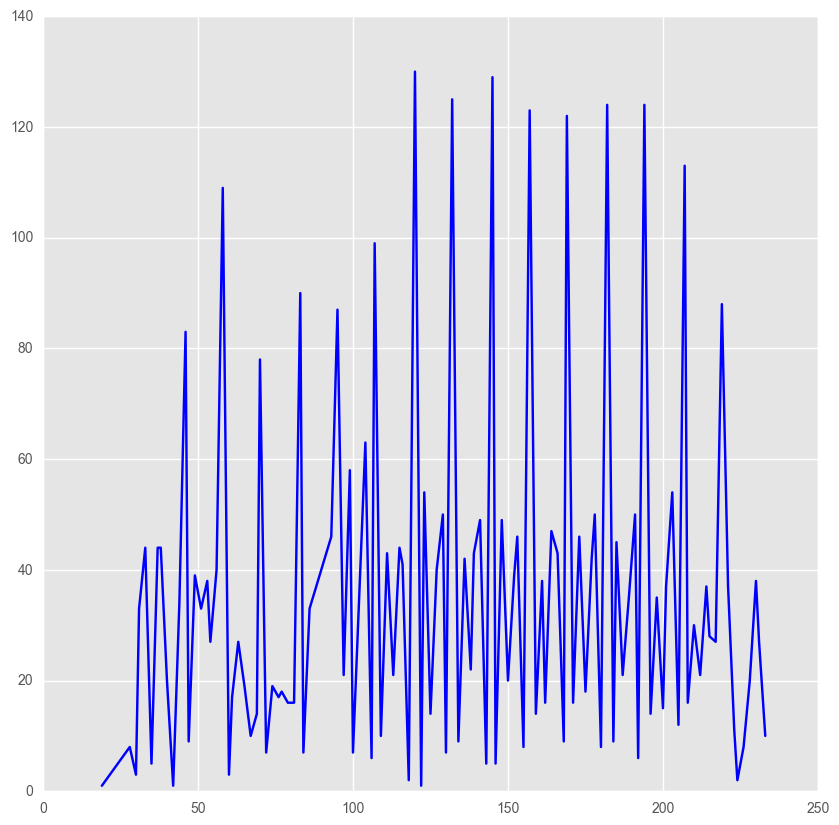

In [58]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'b')

In [121]:
means = []
for index_team in sorted(df.team1.unique()):
    df_for_team1 = df[df['team1'] == index_team]
    df_for_team2 = df[df['team2'] == index_team]
    arr1 = [int(i) for i in df_for_team1['target'].values]
    arr2 = [1 - int(i) for i in df_for_team2['target'].values]
    means.append([index_team, np.array(arr1).mean(), np.array(arr2).mean()])
for c in sorted(means, key=lambda x: np.array(x[1:]).mean(), reverse=True):
    print(c)

[142, 0.81288343558282206, 0.851123595505618]
[81, 0.83615819209039544, 0.79765395894428148]
[146, 0.77410468319559234, 0.80303030303030298]
[111, 0.79300291545189505, 0.75]
[214, 0.77714285714285714, 0.70967741935483875]
[63, 0.76453488372093026, 0.7168674698795181]
[12, 0.74096385542168675, 0.73746312684365778]
[293, 0.76923076923076927, 0.70893371757925072]
[58, 0.71103896103896103, 0.73899371069182385]
[362, 0.74096385542168675, 0.6892307692307692]
[53, 0.72891566265060237, 0.70085470085470081]
[172, 0.69186046511627908, 0.72189349112426038]
[177, 0.70977011494252873, 0.70031545741324919]
[317, 0.68807339449541283, 0.7053571428571429]
[329, 0.68072289156626509, 0.70779220779220775]
[193, 0.68690095846645371, 0.69736842105263153]
[96, 0.71518987341772156, 0.66480446927374304]
[39, 0.72413793103448276, 0.65217391304347827]
[157, 0.70426829268292679, 0.66572237960339942]
[300, 0.6384180790960452, 0.72865853658536583]
[207, 0.6823899371069182, 0.66473988439306353]
[229, 0.6901840490797

In [89]:
df_61 = df[df['team1'] == 61]
df_61_29 = df_61[df_61['team2'] == 29]
df_61_29

year  day  team1  team2  score1  score2 target
1      2998   28     61     29     301     259   True
12486  3001   58     61     29     344     290   True
76323  3015   58     61     29     294     328  False
93887  3018  138     61     29     255     212   True
95223  3018  189     61     29     267     270  False
99592  3019  152     61     29     297     220   True

In [90]:
df_29 = df[df['team1'] == 29]
df_29_61 = df_29[df_29['team2'] == 61]
df_29_61

year  day  team1  team2  score1  score2 target
65562   3013   37     29     61     193     259  False
100998  3019  207     29     61     301     251   True

year            day          team1          team2  \
count  101609.000000  101609.000000  101609.000000  101609.000000   
mean     3009.118425     131.611609     185.041325     184.965574   
std         6.343142      59.264037     104.775785     104.816611   
min      2998.000000       0.000000       2.000000       2.000000   
25%      3004.000000      83.000000      94.000000      93.000000   
50%      3009.000000     136.000000     182.000000     183.000000   
75%      3015.000000     182.000000     278.000000     278.000000   
max      3019.000000     233.000000     364.000000     364.000000   

              score1         score2  
count  101609.000000  101609.000000  
mean      270.281402     270.168646  
std        50.374885      50.330409  
min        81.000000      77.000000  
25%       236.000000     236.000000  
50%       267.000000     267.000000  
75%       301.000000     301.000000  
max       603.000000     615.000000

In [99]:
for row in df.values:
    print(row)
    break

[2998 19 317 131 336 278 True]


In [100]:
df.corr()

year       day     team1     team2    score1    score2    target
year    1.000000 -0.106312 -0.007747 -0.001658 -0.151344 -0.145314 -0.002523
day    -0.106312  1.000000  0.007449  0.000119  0.001297  0.002410 -0.001740
team1  -0.007747  0.007449  1.000000  0.014215  0.016102 -0.005978  0.016153
team2  -0.001658  0.000119  0.014215  1.000000 -0.012873  0.012458 -0.018810
score1 -0.151344  0.001297  0.016102 -0.012873  1.000000  0.293219  0.469837
score2 -0.145314  0.002410 -0.005978  0.012458  0.293219  1.000000 -0.471546
target -0.002523 -0.001740  0.016153 -0.018810  0.469837 -0.471546  1.000000

In [115]:
delim = int(0.75*df.shape[0])
X_train = df.values[:delim, :6]
X_test = df.values[delim:, :6]
y_train = [int(i) for i in df.values[:delim, 6] ]
y_test = [int(i) for i in df.values[delim:, 6] ]

In [123]:
df1 = df[df['team1'] == 10]
df2 = df[df['team2'] == 10]
days1 = list(df1['day'].values) + list(df2['day'].values)

In [129]:
df1 = df[df['team1'] == 10]
df2 = df[df['team2'] == 10]
days1 = list(df1['day'].values) + list(df2['day'].values)
y1 = [0 for i in range(366)]
for day in days1:
    y1[day] = 1

In [130]:
df3 = df[df['team1'] == 300]
df4 = df[df['team2'] == 300]
days2 = list(df3['day'].values) + list(df4['day'].values)
y2 = [0 for i in range(366)]
for day in days2:
    y2[day] = 1

In [133]:
days_cal = [i+1 for i in range(366)]

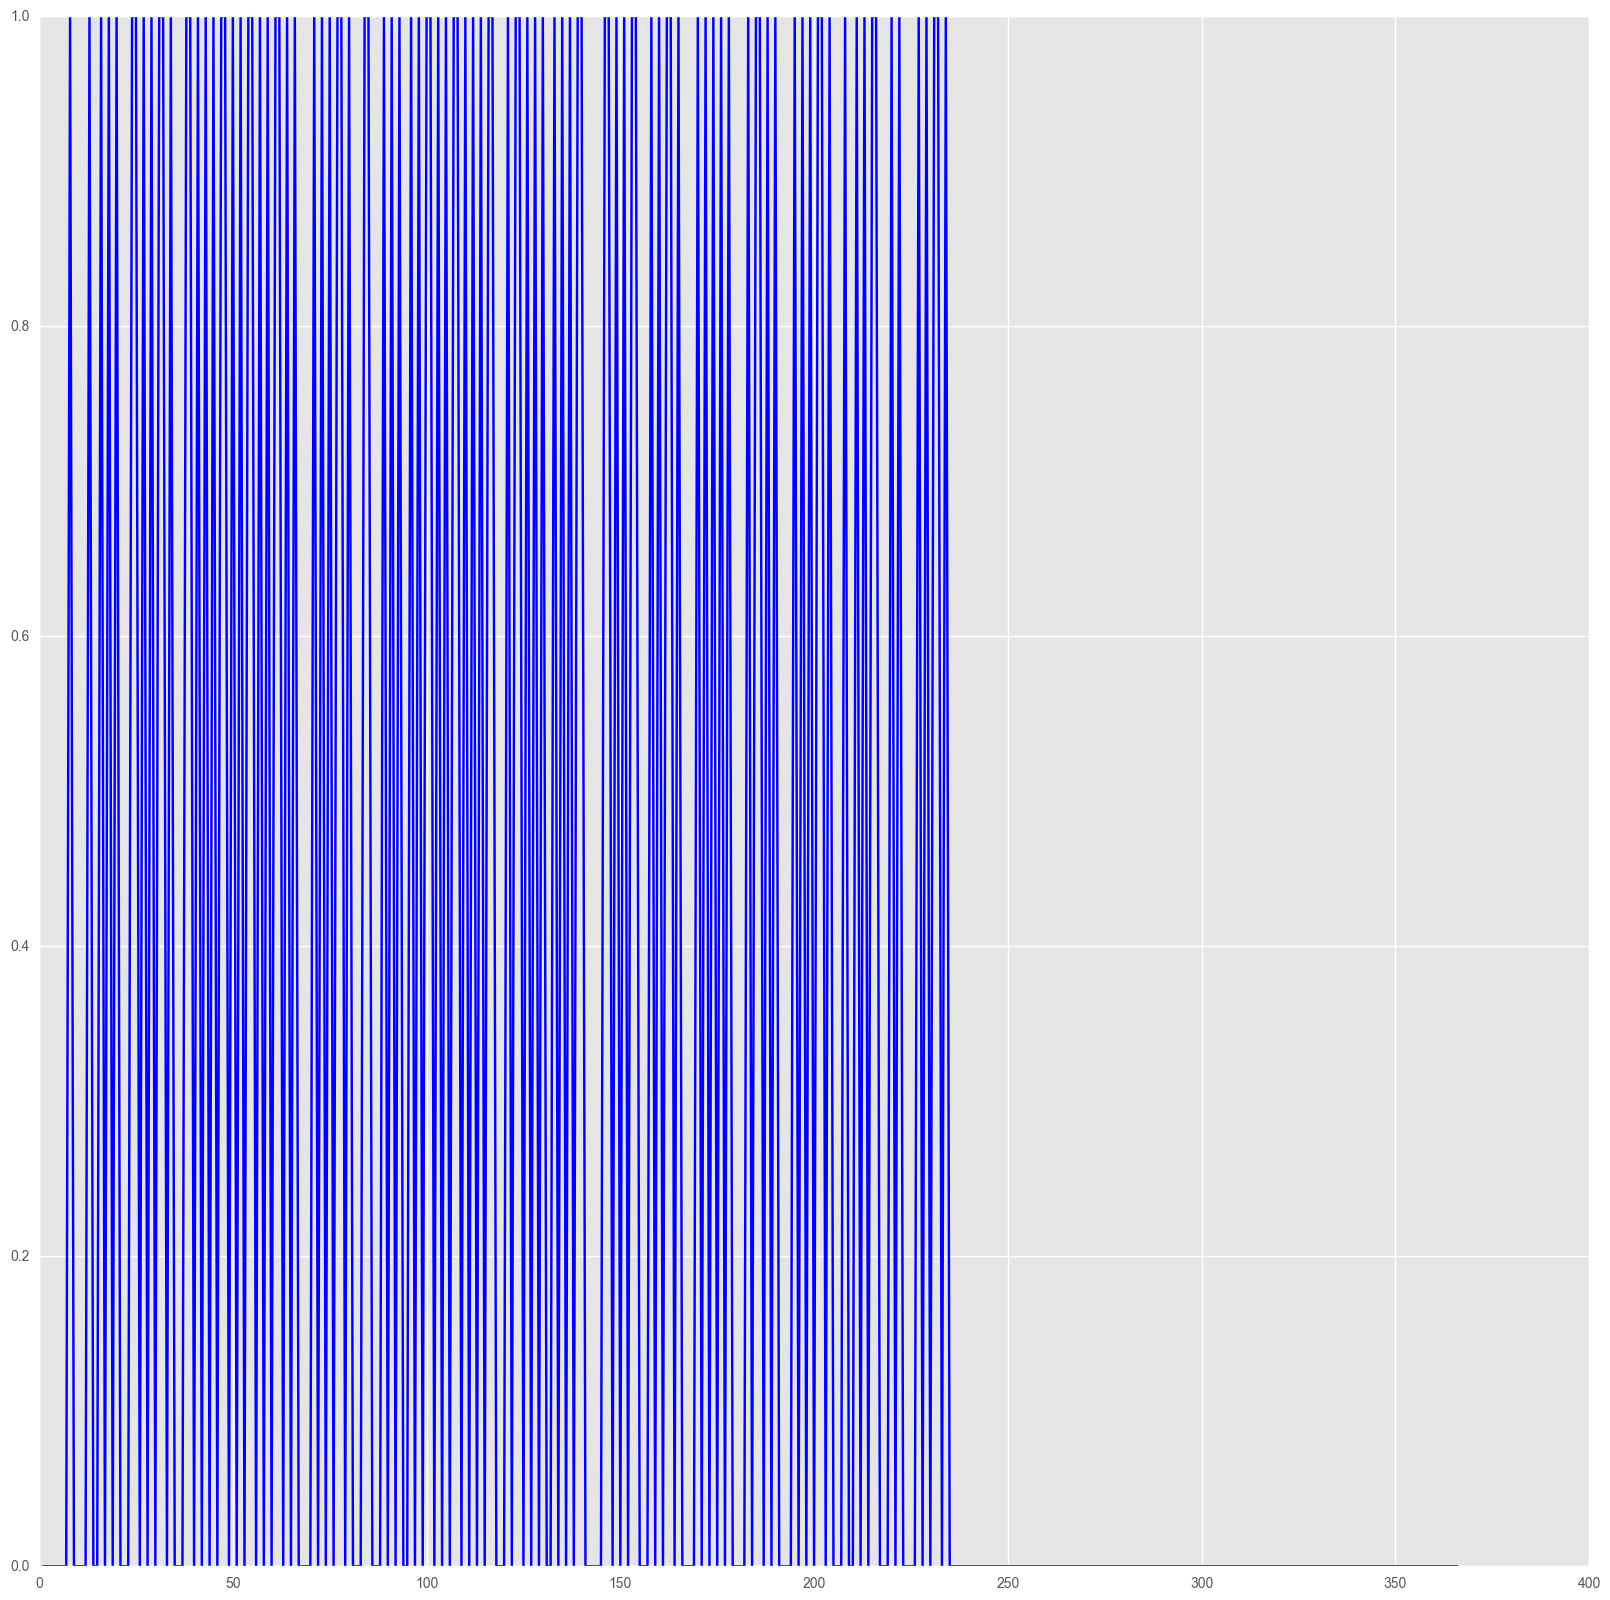

In [137]:
plt.figure(figsize=(20, 20))
#plt.plot(days_cal, y1, 'r')
plt.plot(days_cal, y2, 'b')

In [151]:
diff = []
for row in df.values:
    diff.append((row[2] - row[3]) > 0)
df_added = pd.concat((df, pd.DataFrame(diff, columns = ['diff']) ), axis=1)

In [153]:
df_added.corr()

year       day     team1     team2    score1    score2    target  \
year    1.000000 -0.106312 -0.007747 -0.001658 -0.151344 -0.145314 -0.002523   
day    -0.106312  1.000000  0.007449  0.000119  0.001297  0.002410 -0.001740   
team1  -0.007747  0.007449  1.000000  0.014215  0.016102 -0.005978  0.016153   
team2  -0.001658  0.000119  0.014215  1.000000 -0.012873  0.012458 -0.018810   
score1 -0.151344  0.001297  0.016102 -0.012873  1.000000  0.293219  0.469837   
score2 -0.145314  0.002410 -0.005978  0.012458  0.293219  1.000000 -0.471546   
target -0.002523 -0.001740  0.016153 -0.018810  0.469837 -0.471546  1.000000   
diff   -0.006231  0.007084  0.564954 -0.566825  0.016276 -0.008256  0.017173   

            diff  
year   -0.006231  
day     0.007084  
team1   0.564954  
team2  -0.566825  
score1  0.016276  
score2 -0.008256  
target  0.017173  
diff    1.000000

In [156]:
df[df['team1'] == 317].score1.unique()

array([336, 325, 410, 332, 321, 317, 278, 371, 305, 344, 309, 328, 263,
       247, 267, 348, 383, 282, 216, 259, 359, 445, 417, 286, 270, 390,
       294, 340, 290, 530, 352, 356, 379, 387, 363, 301, 236, 243, 274,
       255, 313, 394, 208, 239, 421, 441, 251, 166, 398, 224, 220, 297,
       197, 406, 201, 193, 232, 212, 228, 367, 375, 178])

In [194]:
diff = []
for row in df.values:
    diff.append((row[2] - row[3]) > 0)
df_added = pd.concat((df, pd.DataFrame(diff, columns = ['diff']) ), axis=1)

In [195]:
df_ = df_added.drop(['target'], axis=1)
y = df_['diff']
X = df_.drop(['year', 'day', 'diff', 'score1', 'score2'], axis=1)

In [177]:
reg = xgb.XGBClassifier()
param_grid = {
    'n_estimators' : np.linspace(10, 100, 10, dtype=int),
    'max_depth':  np.linspace(1, 20, 10, dtype=int)
}

In [178]:
opt = GridSearchCV(reg, param_grid, scoring='log_loss', cv=3)

In [179]:
opt.fit(X.values, y.values)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]), 'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [180]:
opt.best_score_

-0.0031568078824613737

In [181]:
opt.best_params_

{'max_depth': 13, 'n_estimators': 100}

In [182]:
df_test = pd.read_csv('test2.csv')

In [196]:
X_train = df_test.drop(['Id', 'year'], axis=1)

In [193]:
standart = xgb.XGBClassifier()

In [199]:
opt.predict_proba(X_train.values)[:,1].mean()

0.99683988

In [203]:
standart.fit(X.values, y.values)
ans = standart.predict_proba(X_train.values)[:,1]

In [204]:
sample_submission = pd.read_csv('sample_submission.csv')
ss = sample_submission.copy()

ss.target = ans
ss.to_csv('mighty_xgboost.csv', index=False)

In [205]:
df

year  day  team1  team2  score1  score2 target
0       2998   19    317    131     336     278   True
1       2998   28     61     29     301     259   True
2       2998   28    110    141     359     267   True
3       2998   28    352    146     309     410  False
4       2998   28    229     91     332     220   True
5       2998   28    164    238     236     278  False
6       2998   28    184    243     181     224  False
7       2998   28    245     23     216     185   True
8       2998   28    300    349     402     321   True
9       2998   30     61    110     259     325  False
10      2998   30    229    245     294     185   True
11      2998   30    300    243     220     178   True
12      2998   31     10    310     282     232   True
13      2998   31     39     69     317     259   True
14      2998   31    205     43     282     352  False
15      2998   31     47    112     406     398   True
16      2998   31    180     51     282     328  False
17      2998   31     53     22     417     297   True
18      2998   31     63    116     294     178   True
19      2998   31     82    312     336     297   True
20      2998   31    265    101     263     305  False
21      2998   31     70    125     390     448  False
22      2998   31    150    117     332     286   True
23      2998   31    188    158     425     541  False
24      2998   31    161    319     297     294   True
25      2998   31    241    166     212     379  False
26      2998   31    273    169     228     363  False
27      2998   31    232    185     150     301  False
28      2998   31    201     98     309     267   True
29      2998   31    207    126     433     379   True
...      ...  ...    ...    ...     ...     ...    ...
101579  3019  230    333    286     317     305   True
101580  3019  230    335    146     247     185   True
101581  3019  230    215    351     286     294  False
101582  3019  230    358    176     263     228   True
101583  3019  231    225      3     178     251  False
101584  3019  231      7    336     205     189   True
101585  3019  231     52    123     290     232   True
101586  3019  231      4     96     197     236  False
101587  3019  231    143    142     208     270  False
101588  3019  231    157    293     301     236   True
101589  3019  231    172    279     352     305   True
101590  3019  231    201    174     274     313  False
101591  3019  231    335    179     201     247  False
101592  3019  231    351    185     247     259  False
101593  3019  231    188    199     208     220  False
101594  3019  231    207    324     243     216   True
101595  3019  231    326    208     212     247  False
101596  3019  231    214    168     305     294   True
101597  3019  231    272    222     255     263  False
101598  3019  231    177    226     224     236  False
101599  3019  231    317    232     267     301  False
101600  3019  231    314    234     212     247  False
101601  3019  231    241    280     170     174  False
101602  3019  231    287     39     259     216   True
101603  3019  231    333    169     274     239   True
101604  3019  231    131    358     216     263  False
101605  3019  233    174    214     336     297   True
101606  3019  233     96    179     243     255  False
101607  3019  233    226    358     193     166   True
101608  3019  233    333    287     216     239  False

[101609 rows x 7 columns]

year  day  team1  team2  score1  score2 target
17     2998   31     53     22     417     297   True
12243  3001   46     53     22     417     282   True

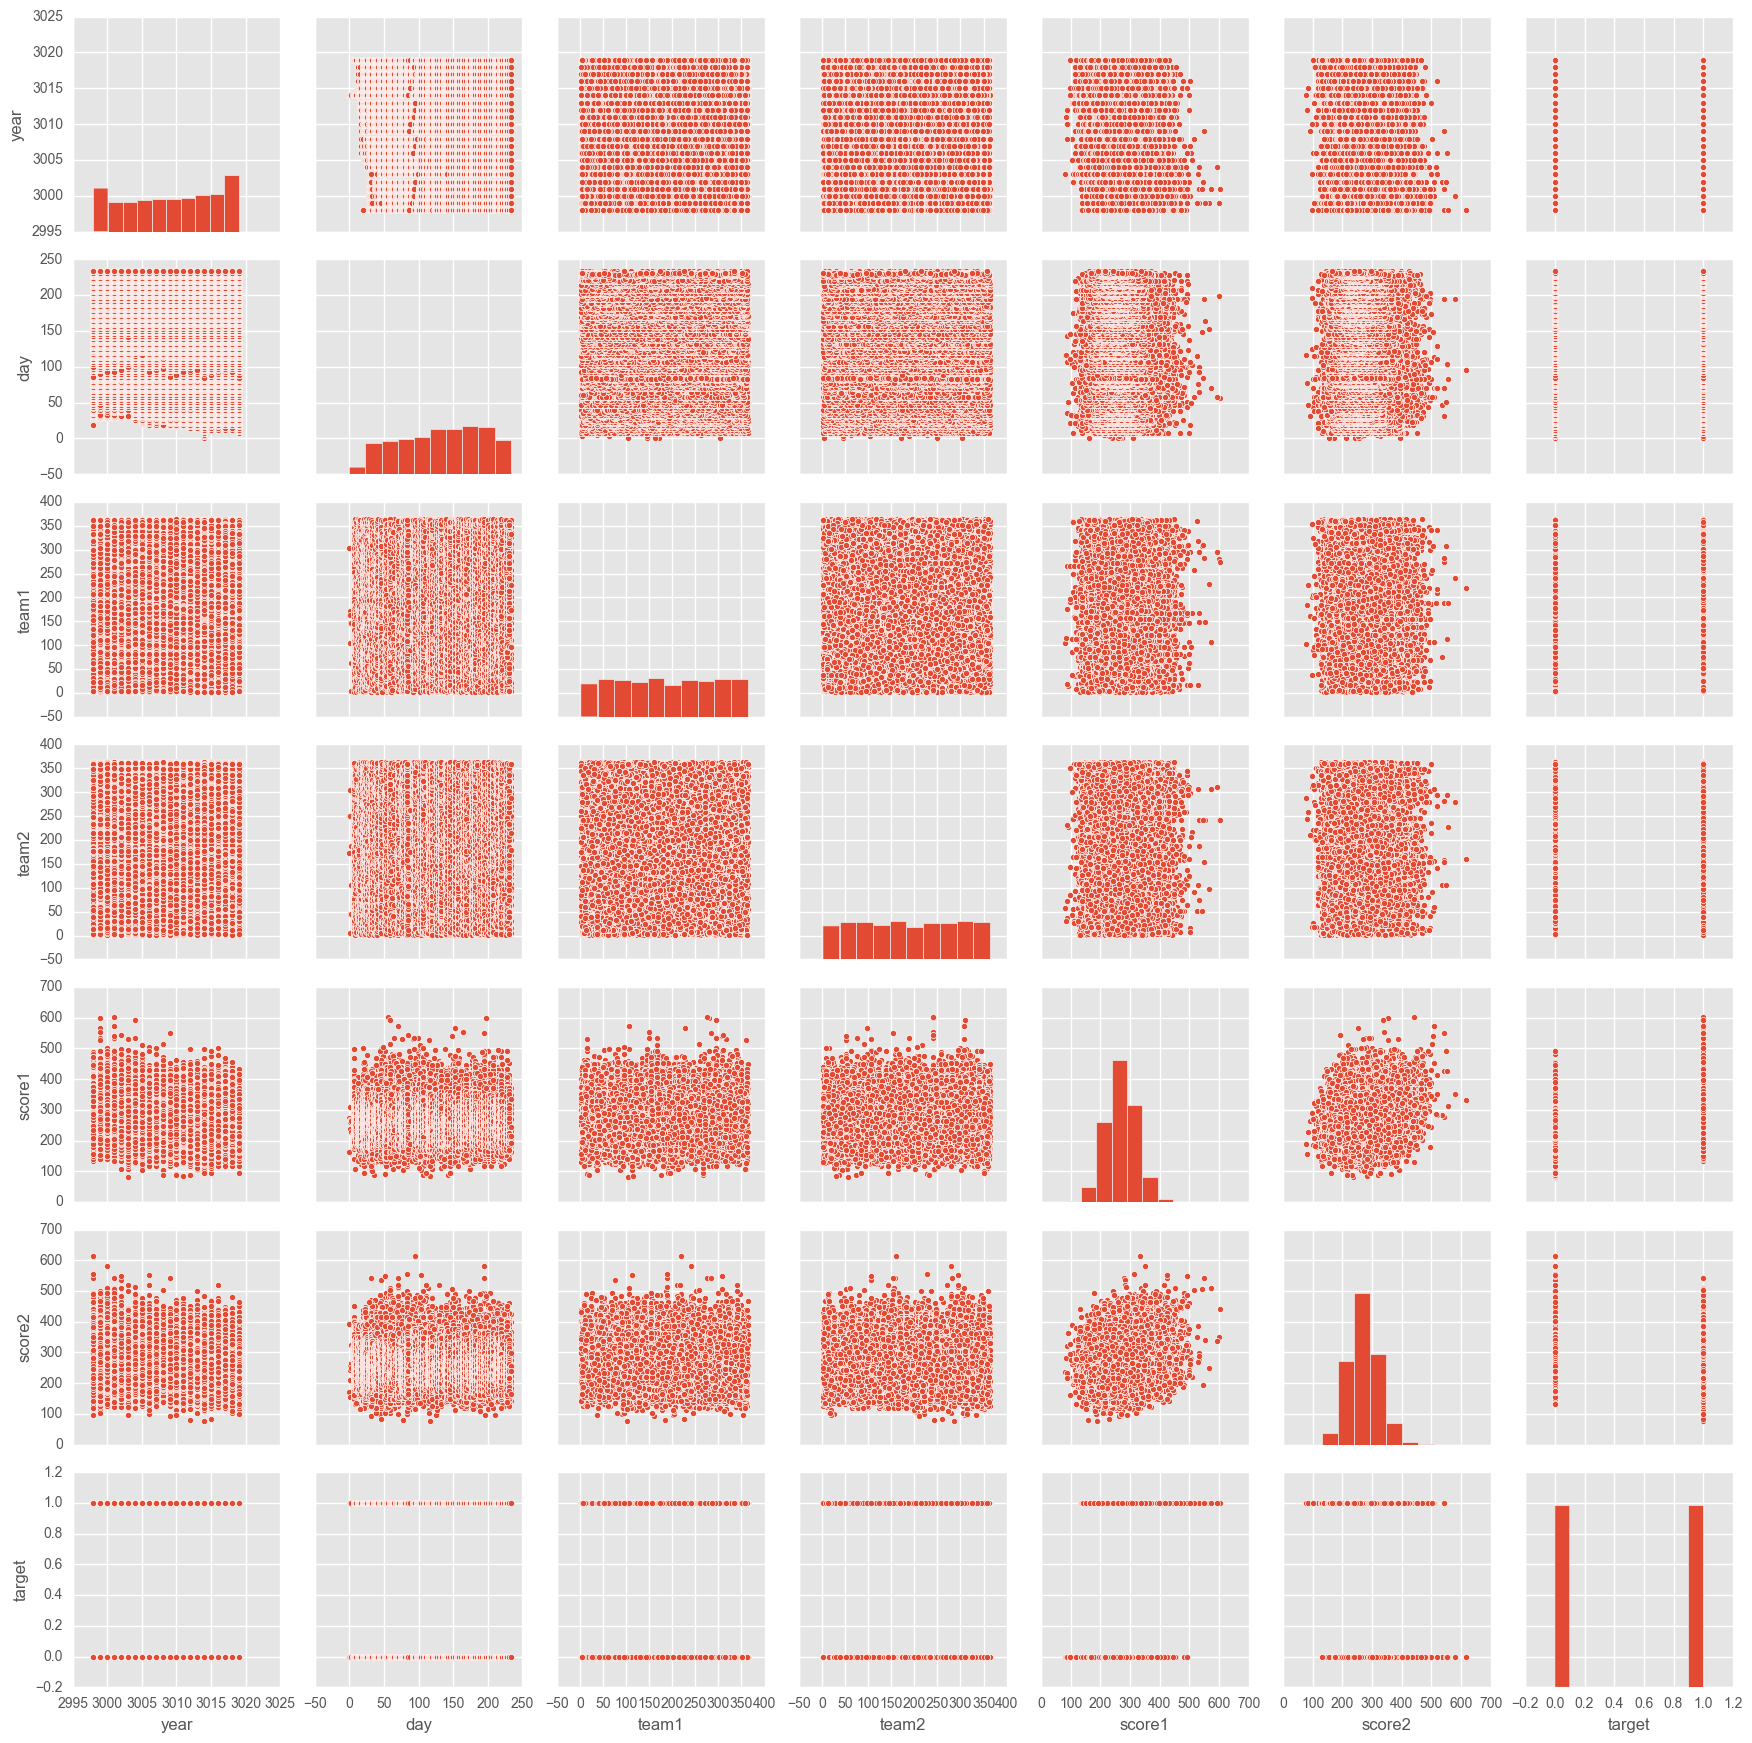

In [216]:
sns.pairplot(df)

In [227]:
plt.

year  day  team1  team2  score1  score2 target
25107   3004   65    301      4     247     313  False
5424    2999  120    301      4     224     247  False
2632    2998  164    301      4     236     286  False
29324   3005   63    301      4     251     224   True
51377   3010   40    301      5     387     251   True
25572   3004   93    301     13     313     321  False
29824   3005   95    301     13     352     371  False
75449   3015   23    301     15     294     181   True
71578   3014   72    301     15     247     143   True
101308  3019  219    301     16     239     282  False
98671   3019  115    301     16     267     197   True
66779   3013   93    301     20     336     224   True
61731   3012   92    301     20     278     259   True
403     2998   53    301     20     321     332  False
100622  3019  189    301     20     251     216   True
101480  3019  226    301     20     274     239   True
60105   3011  219    301     24     325     294   True
31244   3005  157    301     24     220     216   True
90409   3017  207    301     24     197     224  False
11803   3000  214    301     24     356     367  False
93179   3018  111    301     24     201     236  False
21971   3003  127    301     24     255     267  False
14868   3001  169    301     24     309     270   True
77852   3015  127    301     24     325     282   True
26205   3004  127    301     24     247     282  False
72987   3014  139    301     24     425     448  False
54937   3010  201    301     24     236     259  False
54126   3010  169    301     24     247     278  False
6443    2999  157    301     24     309     274   True
17826   3002  127    301     24     259     286  False
...      ...  ...    ...    ...     ...     ...    ...
13777   3001  127    301    303     348     309   True
80408   3015  226    301    303     321     340  False
14965   3001  175    301    303     205     305  False
83973   3016  157    301    303     328     270   True
84619   3016  182    301    303     259     251   True
18030   3002  132    301    303     208     317  False
72713   3014  127    301    303     205     263  False
10785   3000  169    301    303     344     340   True
11982   3000  219    301    303     309     344  False
40791   3007  182    301    303     278     270   True
64865   3012  219    301    303     290     228   True
79688   3015  194    301    303     305     282   True
60798   3012   46    301    308     321     220   True
75989   3015   44    301    309     216     259  False
40931   3007  189    301    310     313     301   True
8906    3000   86    301    311     348     278   True
4773    2999   83    301    311     263     243   True
17088   3002   86    301    318     267     286  False
12604   3001   61    301    318     294     267   True
52672   3010  107    301    319     290     259   True
92432   3018   70    301    319     259     208   True
52094   3010   79    301    327     239     189   True
47411   3009   72    301    327     290     309  False
70389   3014   15    301    331     313     294   True
100501  3019  182    301    335     216     243  False
70699   3014   28    301    349     297     243   True
87183   3017   70    301    349     243     239   True
25969   3004  113    301    350     255     290  False
81274   3016   44    301    352     255     282  False
16556   3002   56    301    353     189     232  False

[327 rows x 7 columns]